In [4]:
import numpy as np
import cvxopt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import os
import cv2
from skimage.color import rgb2lab, lab2rgb
from mpl_toolkits.mplot3d import Axes3D
import math


In [6]:
def objects(path):
    object  = os.listdir(path)
    return object
path = "C:/Users/rene/Google Drive/5.1/AP 186/Activity 15 - Expectation Maximization/Banana/"
name = objects(path = path)

def dataset_loader(datatype, imagetype):
    def loadImages(path = path +str(datatype)+"/"):

        return[os.path.join(path,f) for f in os.listdir(path) if f.endswith(imagetype)]

    filenames = loadImages()
    images = []
    for file in filenames:
        image = cv2.imread(file)
        image = cv2.resize(image, (100,100))
        images.append((image[:,:,::-1])/255)

    return images

In [7]:
def LAB_mean(datatype):
    images = dataset_loader(datatype, ".jpg")

    a_ = []
    b_ = []
    hue = []
    for i in range(len(images)):
        img = images[i]#[:,:,::-1]
        lab = rgb2lab(img)
        a,b = lab[:,:,1].ravel(),lab[:,:,2].ravel()
        a_.append(np.mean(a))
        b_.append(np.mean(b))
        h = math.atan2(np.mean(b),np.mean(a)) * 180 / np.pi
        if h < 0:
            h = 360 - np.abs(h)
        hue.append(h)
        

    return a_, b_, hue


def Ecc(datatype):
    images = dataset_loader(datatype, ".jpg")
    E = []
    for i in range(len(images)):
        img = images[i]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.bitwise_not(img)
        thresh = 0.05
        img = img/255
        img[img<thresh] = 0
        img[img>thresh] = 1
        A = measure.label(img, neighbors=4)
        for region in measure.regionprops(A,coordinates='xy'):
            E.append(region.eccentricity)
            
    return E

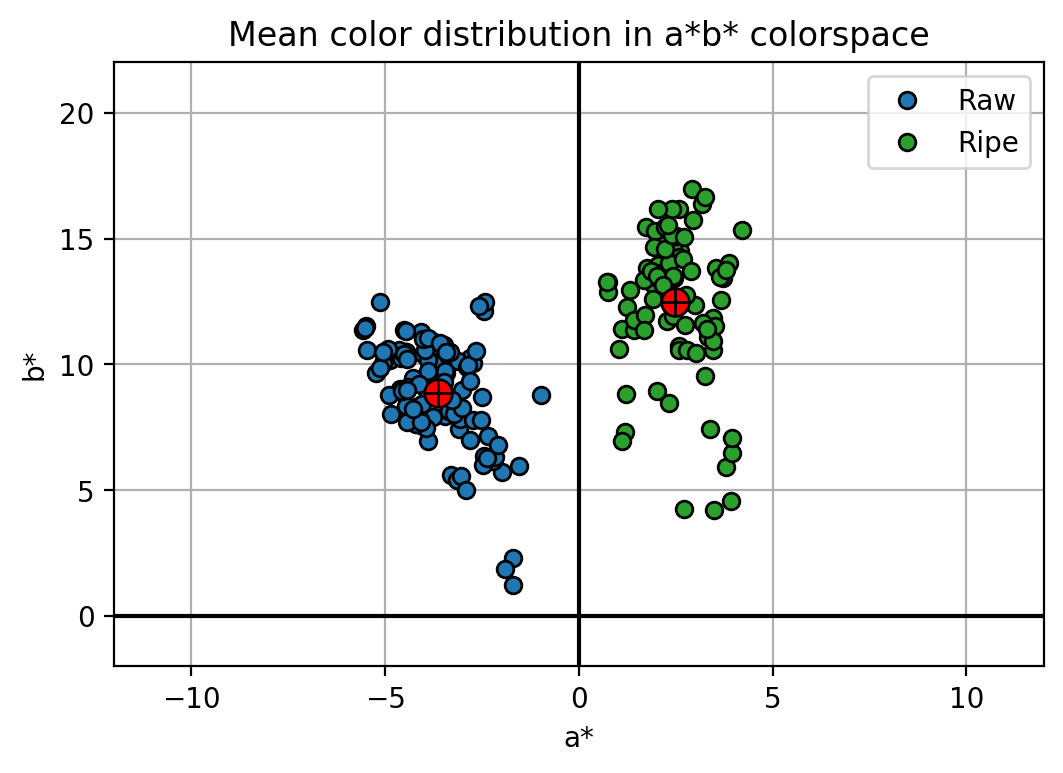

In [8]:
plt.figure(dpi=200)
plt.axhline(0, color = 'k')
plt.axvline(0, color = 'k')

l = [-1,1]
data = np.zeros(shape=[80,2,2])
A,B = [],[]
label_A, label_B = [],[]
mean = np.zeros(shape=[2,2])
COV = np.zeros(shape=[2,2,2])


for i in name:
    classs = name.index(i)
    a_, b_, hue = LAB_mean(i)
    data[:,0, classs] = a_[:80]
    data[:,1, classs] = b_[:80]
    for a in a_: 
        A.append(a)
        label_A.append(l[classs])
    for b in b_: 
        B.append(b)
        label_B.append(l[classs])


    mean[classs,0] = np.mean(a_)
    mean[classs,1] = np.mean(b_)
    
    COV[:,:,classs] = np.cov(a_,b_)
    plt.plot(a_,b_,'o',ms = 6, mec = 'k', label = i)
    plt.plot(np.mean(a_),np.mean(b_), 'ro', ms= 10, mec = 'k')
    plt.plot(np.mean(a_),np.mean(b_), '+', ms= 10, mec = 'k')

    plt.xlabel("a*")
    plt.ylabel("b*")
    plt.xlim(-12,12)
    plt.ylim(-2,22)
    
plt.legend()
plt.grid()
plt.title("Mean color distribution in a*b* colorspace")

DATA = np.zeros(shape = [192,2])
DATA[:,0],DATA[:,1] = np.array(A),np.array(B)
LABEL = np.zeros(shape = [192,2])
LABEL[:,0],LABEL[:,1] = np.array(label_A),np.array(label_B)


In [9]:
DATA,LABEL

(array([[-4.46836187, 10.50290809],
        [-4.87520784, 10.16763863],
        [-2.81294402, 10.24400093],
        [-4.10440417,  9.21646413],
        [-2.45393056, 12.1060658 ],
        [-4.46836187, 10.50290809],
        [-3.84163113, 10.34028646],
        [-3.44686581,  7.94523476],
        [-5.13513415, 12.47352728],
        [-2.42899152, 12.48364558],
        [-4.58602445, 10.27464839],
        [-4.64964304, 10.58461623],
        [-4.2742418 ,  9.47760759],
        [-3.94320677,  9.01121599],
        [-4.0157882 , 10.39964166],
        [-4.51030747, 11.37590564],
        [-2.57265987, 12.30722162],
        [-3.56812177, 10.15715664],
        [-3.52433241,  9.67077583],
        [-3.77754944,  9.44386418],
        [-3.10865753, 10.14545567],
        [-4.06425375, 11.28490892],
        [-3.75066475, 10.00821729],
        [-4.51150676, 10.41334498],
        [-3.10619884,  7.42164048],
        [-3.4393142 ,  9.64684732],
        [-3.89239352, 10.17450846],
        [-3.36466307,  8.135

In [10]:
class Perceptron(object):
    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 1
        else:
          activation = -1            
        return activation
    
    def train(self, training_inputs, labels):
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

In [12]:
perceptron = Perceptron(2)
perceptron.train(DATA, LABEL[:,0])
w0,w1,w2 = perceptron.weights

In [15]:
x = np.linspace(-10,10,100)

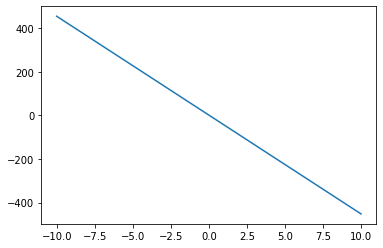

In [16]:
plt.plot(x,-w1/w2*x-w0/w2, label= "Decision Line")

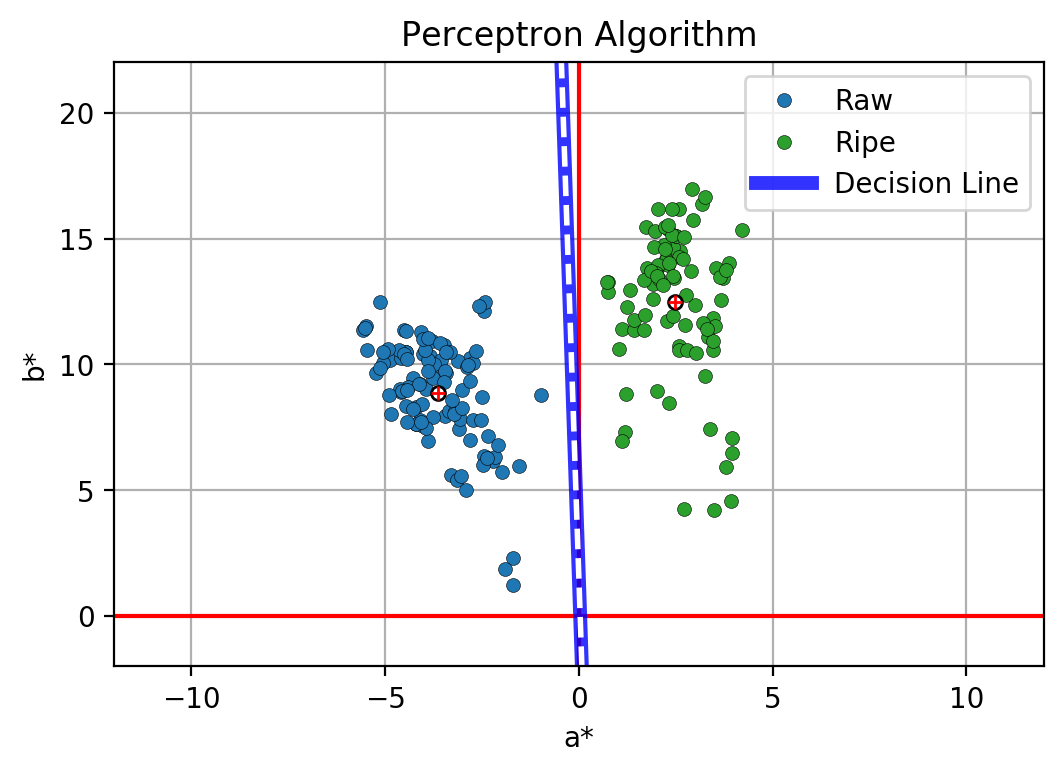

In [45]:
plt.figure(dpi=200)
plt.axvline(0, color = 'r')
plt.axhline(0, color = 'r')


for i in name:
    classs = name.index(i)
    a_, b_, hue = LAB_mean(i)

    mean[classs,0] = np.mean(a_)
    mean[classs,1] = np.mean(b_)
    plt.grid()

    plt.plot(a_,b_,'o',ms = 5, mec = 'k', label = i, mew = 0.2)
    plt.plot(np.mean(a_),np.mean(b_), 'wo', ms= 5, mec = 'k')
    plt.plot(np.mean(a_),np.mean(b_), '+', ms= 5, mec = 'r')

    plt.xlabel("a*")
    plt.ylabel("b*")

    plt.xlim(-12,12)
    plt.ylim(-2,22)
    
plt.plot(x,-w1/w2*x-w0/w2,'b-', lw = 5, alpha = 0.8,label= "Decision Line") 
plt.plot(x,-w1/w2*x-w0/w2,'w--', lw = 2,) 
plt.legend()
plt.title("Perceptron Algorithm")
plt.grid()

In [32]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state = 1)
classifier.fit(DATA,LABEL[:,0])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://stackoverflow.com/questions/23794277/extract-decision-boundary-with-scikit-learn-linear-svm

In [34]:
X, Y = np.meshgrid(np.linspace(-12,12,200), np.linspace(-2,22,200))
Z = classifier.predict(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)

In [35]:
#SV = classifier.support_vectors_
xy = np.vstack([X.ravel(), Y.ravel()]).T

Z = classifier.decision_function(xy).reshape(X.shape)

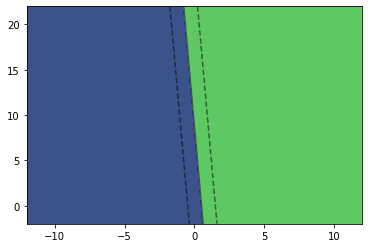

In [37]:
plt.contour(X, Y, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
plt.contourf(X, Y, Z, cmap = 'viridis', levels = 1)
#plt.plot(SV[:,0],SV[:,1], 'ro')

Text(0.5, 1.0, 'Support Vector Machine')

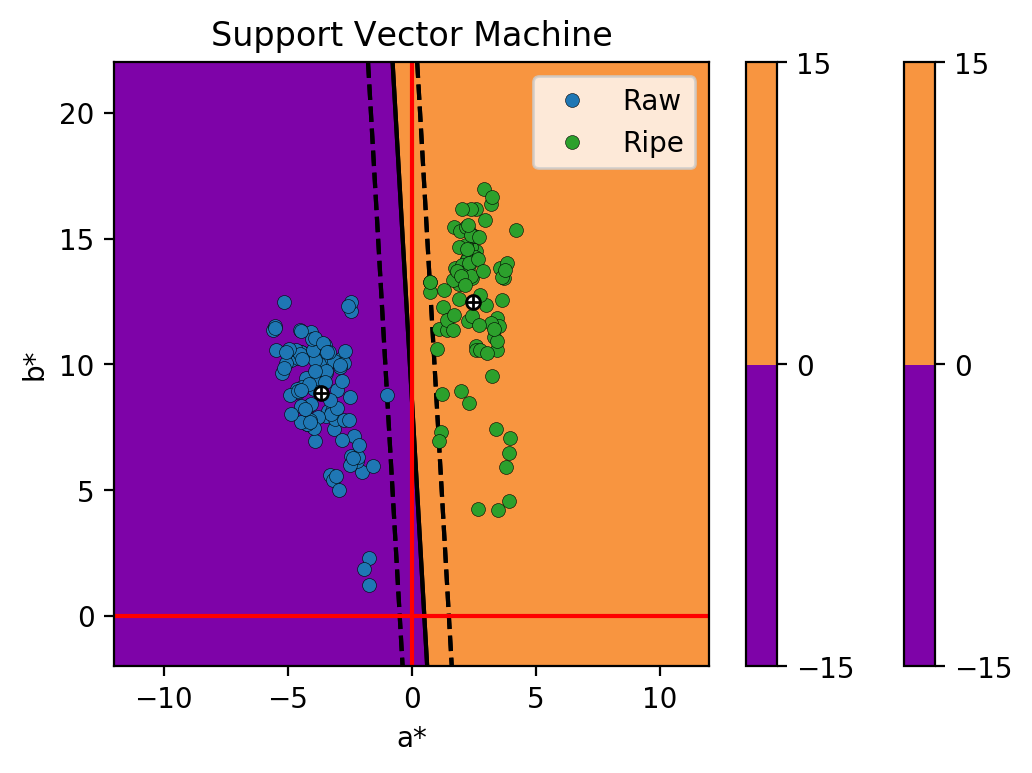

In [41]:
plt.figure(dpi=200)
plt.axvline(0, color = 'r')
plt.axhline(0, color = 'r')


for i in name:
    classs = name.index(i)
    a_, b_, hue = LAB_mean(i)

    mean[classs,0] = np.mean(a_)
    mean[classs,1] = np.mean(b_)
    plt.grid()

    plt.plot(a_,b_,'o',ms = 5, mec = 'k', label = i, mew = 0.2)
    plt.plot(np.mean(a_),np.mean(b_), 'wo', ms= 5, mec = 'k')
    plt.plot(np.mean(a_),np.mean(b_), '+', ms= 5, mec = 'k')
    plt.contour(X, Y, Z, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
    plt.contourf(X, Y, Z, cmap = 'plasma', levels = 1)
    plt.colorbar()
    plt.xlabel("a*")
    plt.ylabel("b*")

    plt.xlim(-12,12)
    plt.ylim(-2,22)
    
plt.legend()
plt.title("Support Vector Machine")

In [9]:
n_samples = 250
K = np.zeros((n_samples, n_samples))


In [10]:
class SVM:
    def fit(self, X, y):
        n_samples, n_features = X.shape
# P = X^T X
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = np.dot(X[i], X[j])
                
    P = cvxopt.matrix(np.outer(y, y) * K)
# q = -1 (1xN)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
# A = y^T 
    A = cvxopt.matrix(y, (1, n_samples))
# b = 0 
    b = cvxopt.matrix(0.0)
# -1 (NxN)
    G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
# 0 (1xN)
    h = cvxopt.matrix(np.zeros(n_samples))
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
# Lagrange multipliers
    a = np.ravel(solution['x'])
# Lagrange have non zero lagrange multipliers
    sv = a > 1e-5
    ind = np.arange(len(a))[sv]
    self.a = a[sv]
    self.sv = X[sv]
    self.sv_y = y[sv]
# Intercept
    self.b = 0
    for n in range(len(self.a)):
        self.b += self.sv_y[n]
        self.b -= np.sum(self.a * self.sv_y * K[ind[n], sv])
    self.b /= len(self.a)
# Weights
    self.w = np.zeros(n_features)
    for n in range(len(self.a)):
        self.w += self.a[n] * self.sv_y[n] * self.sv[n]

    def project(self, X):
        return np.dot(X, self.w) + self.b
    
    
    def predict(self, X):
        return np.sign(self.project(X))

     pcost       dcost       gap    pres   dres
 0: -2.5000e+02 -5.0000e+02  2e+02  0e+00  2e+00
 1: -6.2125e+02 -6.2746e+02  6e+00  9e-16  1e+00
 2: -6.2734e+04 -6.2740e+04  6e+00  4e-13  1e+00
 3: -6.2119e+08 -6.2119e+08  6e+02  7e-09  1e+00
 4: -6.1498e+14 -6.1498e+14  6e+06  0e+00  1e+00
 5: -6.0883e+22 -6.0883e+22  6e+12  7e+04  1e+00
 6: -6.0274e+32 -6.0274e+32  6e+20  1e+16  1e+00
 7: -5.9671e+44 -5.9671e+44  6e+30  5e+27  1e+00
 8: -5.8885e+58 -5.8885e+58  6e+42  1e+42  1e+00
 9: -5.8885e+90 -8.4405e+90  3e+90  6e+73  1e+00
10: -2.3406e+91 -2.3508e+91  1e+89  0e+00  1e+00
11: -5.3932e+93 -5.3934e+93  2e+89  2e+77  1e+00
12: -1.2321e+98 -1.2321e+98  5e+91  5e+81  1e+00
13: -2.8144e+104 -2.8144e+104  1e+96  5e+86  1e+00
14: -6.4289e+112 -6.4289e+112  3e+102  2e+96  1e+00
15: -1.4685e+123 -1.4685e+123  6e+110 6e+106  1e+00
16: -3.3508e+135 -3.3508e+135  1e+121 3e+119  1e+00
17: -7.1835e+149 -7.1835e+149  2e+134 4e+133  1e+00
18: -1.8236e+165 -1.8236e+165  2e+149  0e+00  1e+00
19: 

ValueError: domain error

In [7]:
X, y = make_blobs(n_samples=250, centers=2,
                  random_state=0, cluster_std=0.60)
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y


In [4]:
y

array([-1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1., -1., -1.,
       -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,
       -1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,
       -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,
        1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,
       -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,
       -1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.,
        1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,
       -1., -1., -1.,  1.,  1.,  1., -1., -1.,  1., -1., -1., -1., -1.,
        1.,  1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,
       -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,
        1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1